# STEP 1-IMPORTING LIBRARIES AND LOAD DATASET 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\DS PROJECTS\AIR BNB ANALYSIS\Airbnb NYC 2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# STEP 2-BASIC EXPLORATION USING- SHAPE, INFO, DESCRIBE. COLUMN, NUNIQUE

In [6]:
df.shape
df.info()
df.describe()
df.columns
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# STEP 3-CHECK MISSSING VALUES

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# STEP 4- DATA CLEANING

# PERFORM:

-Handle missing values using fillna, dropna, etc.

-Remove duplicates.

-Check for invalid values(like negative prices).

-Convert data types where needed.

In [33]:
# Checking missing values from data

print("Missing Values (%):")
missing = df.isnull().sum()
percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))


Missing Values (%):
                   Missing Values  Percentage (%)
reviews_per_month           10052       20.558339
last_review                 10052       20.558339
host_name                      21        0.042949
name                           16        0.032723


In [38]:
# Example: 'name' or 'host_name' may have missing entries; let's fill with 'Unknown'

df["name"] = df["name"].fillna("Unknown")
df["host_name"] = df["host_name"].fillna("Unknown")

# For numerical columns (like reviews or availability), fill with median or 0

df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# Verify missing values again
print("After Filling Missing Values:")
print(df.isnull().sum())

After Filling Missing Values:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [39]:
# Check for Invalid Values

invalid_prices = df[df['price'] <= 0]
print(f"\nInvalid price rows: {len(invalid_prices)}")


Invalid price rows: 11


In [7]:
# Remove them if any

df = df[df['price'] > 0]

In [8]:
# Unusually high minimum nights (say > 365) might be unrealistic

print(f"Listings with very high minimum_nights: {sum(df['minimum_nights'] > 365)}")
df = df[df['minimum_nights'] <= 365]

Listings with very high minimum_nights: 0


In [9]:
# Convert 'last_review' to datetime (if exists)

if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

C:\Users\aryan\AppData\Local\Temp\ipykernel_11388\1822315618.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [10]:
#  Final Check
# ----------------------------------------------
print("\nFinal Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 48870 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48870 non-null  int64         
 1   name                            48855 non-null  object        
 2   host_id                         48870 non-null  int64         
 3   host_name                       48849 non-null  object        
 4   neighbourhood_group             48870 non-null  object        
 5   neighbourhood                   48870 non-null  object        
 6   latitude                        48870 non-null  float64       
 7   longitude                       48870 non-null  float64       
 8   room_type                       48870 non-null  object        
 9   price                           48870 non-null  int64         
 10  minimum_nights                  48870 non-null  int64 

# STEP 4- FEATURE UNDERSTANDING (Univariate Analysis)

Focus on individual variables.

# CATEGORICAL VARIABLES:

-neighbourhood_group

-neighbourhood

-room_type

# NUMERIC VARIABLES:

-price

-minimum_nights

-number_of_reviews

-availability_365

# CATEGORICAL VARIABLES:

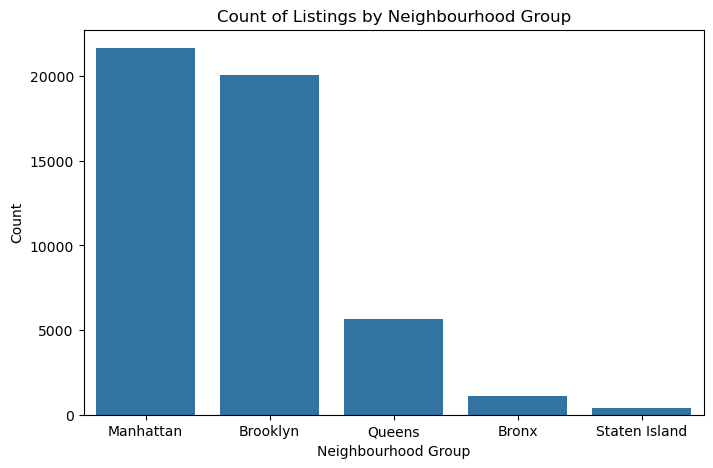

In [52]:
# Neighbourhood Group
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title('Count of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

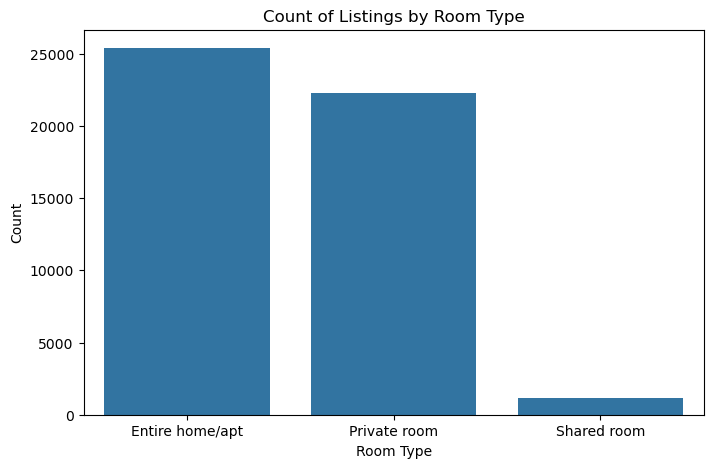

In [55]:
# Room Type

plt.figure(figsize=(8,5))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

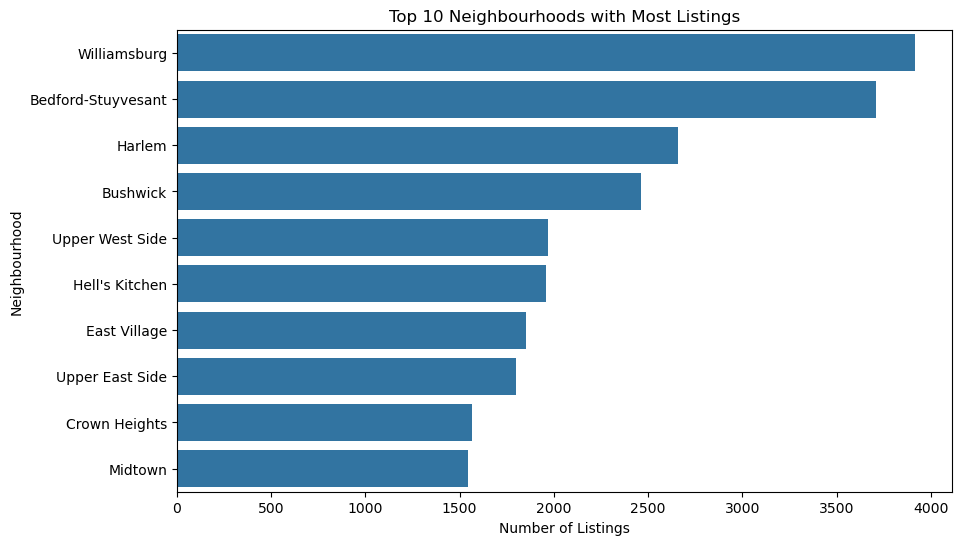

In [56]:
# Top 10 Neighbourhoods (since there are many)

plt.figure(figsize=(10,6))
top10_neigh = df['neighbourhood'].value_counts().nlargest(10)
sns.barplot(x=top10_neigh.values, y=top10_neigh.index)
plt.title('Top 10 Neighbourhoods with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()

# NUMERICAL VARIABLES

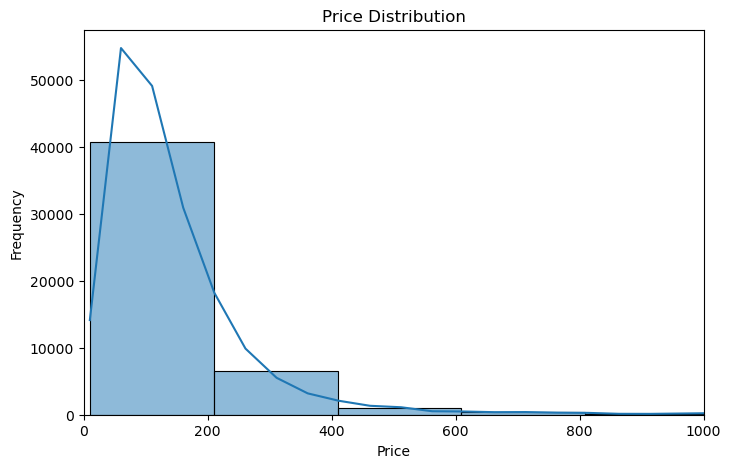

In [57]:
# Price distribution

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)   # optional: limit x-axis to remove extreme outliers visually
plt.show()

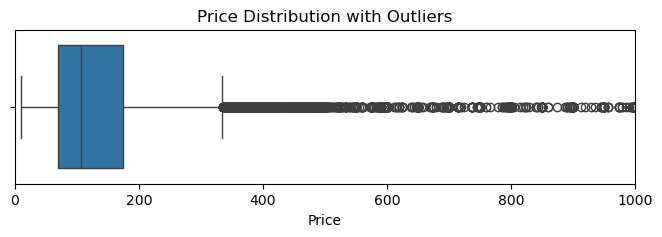

In [58]:
# Boxplot for Price (to visualize outliers)

plt.figure(figsize=(8,2))
sns.boxplot(x='price', data=df)
plt.title('Price Distribution with Outliers')
plt.xlabel('Price')
plt.xlim(0, 1000)
plt.show()

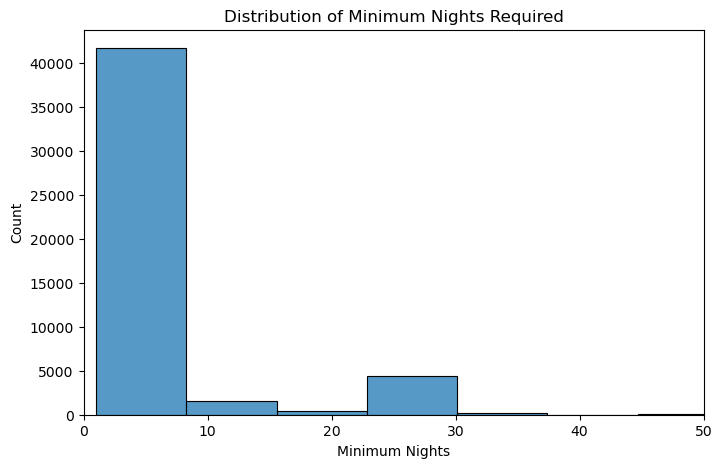

In [59]:
# Minimum Nights distribution

plt.figure(figsize=(8,5))
sns.histplot(df['minimum_nights'], bins=50, kde=False)
plt.title('Distribution of Minimum Nights Required')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xlim(0, 50)
plt.show()

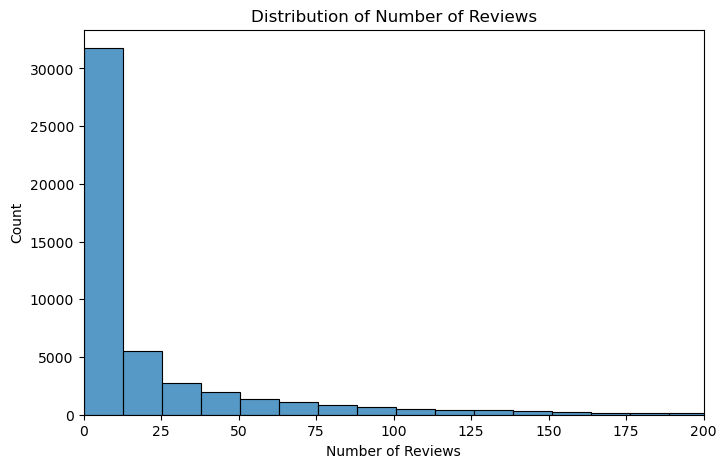

In [61]:
# Number of Reviews distribution

plt.figure(figsize=(8,5))
sns.histplot(df['number_of_reviews'], bins=50, kde=False)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.xlim(0, 200)
plt.show()

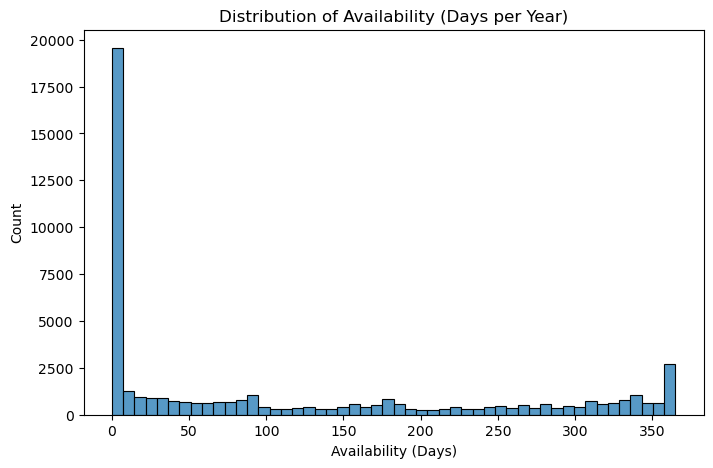

In [62]:
# Availability distribution

plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=50, kde=False)
plt.title('Distribution of Availability (Days per Year)')
plt.xlabel('Availability (Days)')
plt.ylabel('Count')
plt.show()

# Host Activity

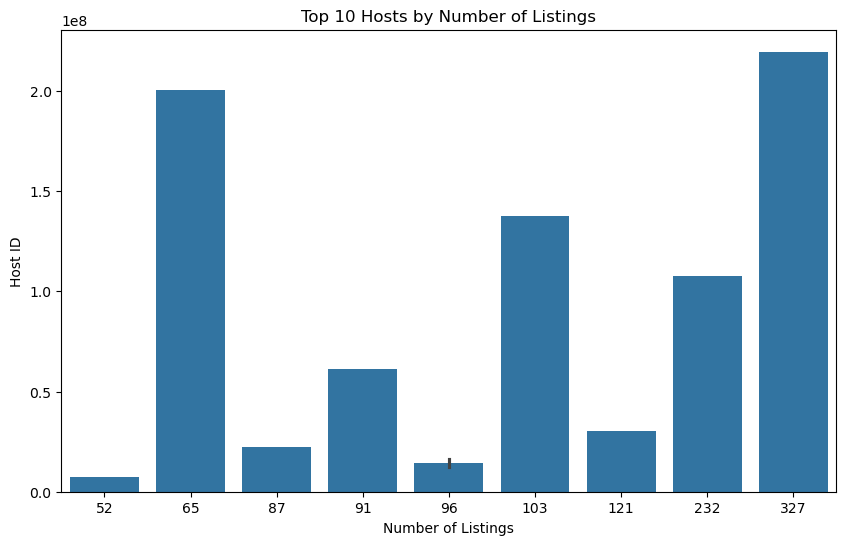

In [64]:
top_hosts = df['host_id'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Host ID")
plt.show()

# Neighbourhood Distribution within Each Group

In [65]:
for group in df['neighbourhood_group'].unique():
    print(f"\nTop neighbourhoods in {group}:")
    print(df[df['neighbourhood_group']==group]['neighbourhood'].value_counts().head(5))



Top neighbourhoods in Brooklyn:
neighbourhood
Williamsburg          3917
Bedford-Stuyvesant    3709
Bushwick              2461
Crown Heights         1563
Greenpoint            1114
Name: count, dtype: int64

Top neighbourhoods in Manhattan:
neighbourhood
Harlem             2656
Upper West Side    1971
Hell's Kitchen     1958
East Village       1853
Upper East Side    1798
Name: count, dtype: int64

Top neighbourhoods in Queens:
neighbourhood
Astoria             900
Long Island City    535
Flushing            426
Ridgewood           423
Sunnyside           363
Name: count, dtype: int64

Top neighbourhoods in Staten Island:
neighbourhood
St. George       48
Tompkinsville    42
Stapleton        27
Concord          26
Arrochar         21
Name: count, dtype: int64

Top neighbourhoods in Bronx:
neighbourhood
Kingsbridge    70
Fordham        63
Longwood       62
Mott Haven     60
Concourse      50
Name: count, dtype: int64


# For Numerical Columns

In [67]:
df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].skew()


price                19.117482
minimum_nights       11.616355
number_of_reviews     3.690683
availability_365      0.763985
dtype: float64

# Descriptive Statistics Summary

In [68]:
df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe().T


,count,mean,std,min,25%,50%,75%,max
price,48870.0,152.759402,240.199363,10.0,69.0,106.0,175.0,10000.0
minimum_nights,48870.0,6.840311,16.453077,1.0,1.0,3.0,5.0,365.0
number_of_reviews,48870.0,23.277143,44.556389,0.0,1.0,5.0,24.0,629.0
availability_365,48870.0,112.728443,131.596499,0.0,0.0,45.0,227.0,365.0


# Check Outlier Counts

In [69]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in Price: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}%)")


Outliers in Price: 2971 (6.08%)


# Price Range Categorization

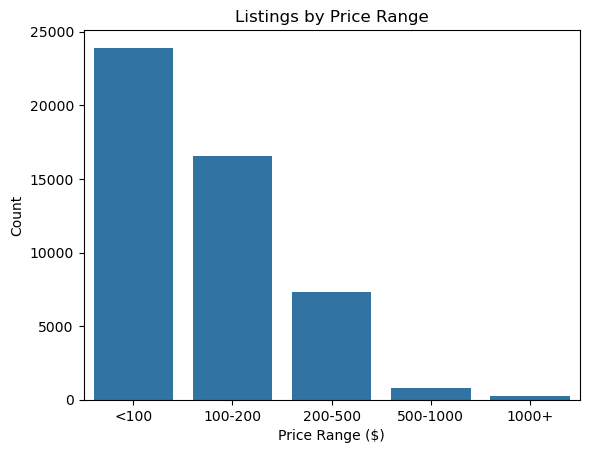

In [71]:
bins = [0, 100, 200, 500, 1000, df['price'].max()]
labels = ['<100', '100-200', '200-500', '500-1000', '1000+']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)
sns.countplot(x='price_category', data=df)
plt.title("Listings by Price Range")
plt.xlabel("Price Range ($)")
plt.ylabel("Count")
plt.show()


# Average Reviews per Listing

In [72]:
avg_reviews = df['number_of_reviews'].mean()
print(f"Average number of reviews per listing: {avg_reviews:.2f}")


Average number of reviews per listing: 23.28


# Location-Based Summary

In [73]:
df.groupby('neighbourhood_group')[['price', 'number_of_reviews', 'availability_365']].mean().sort_values('price', ascending=False)


,price,number_of_reviews,availability_365
neighbourhood_group,,,
Manhattan,196.888011,20.992195,111.929667
Brooklyn,124.452238,24.202897,100.159739
Staten Island,114.812332,30.941019,199.678284
Queens,99.493997,27.704802,144.422493
Bronx,87.577064,25.977982,165.794495


# STEP-5 BIVARIATE ANALYSIS

Understand relationships between variables

# Room type & Price

<Axes: xlabel='room_type', ylabel='price'>

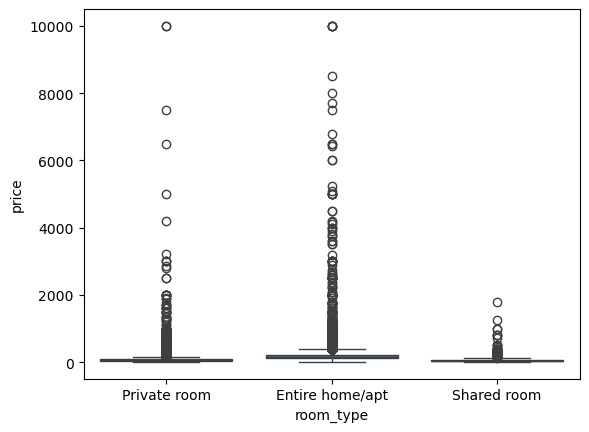

In [75]:
sns.boxplot(x='room_type', y='price', data=df)


# Neighbourhood Group & Price:

<Axes: xlabel='neighbourhood_group', ylabel='price'>

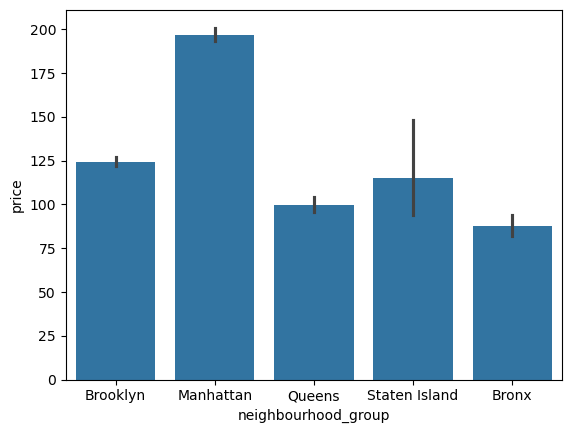

In [78]:
sns.barplot(x='neighbourhood_group', y='price', data=df)


# Number of reviews vs Price:

<Axes: xlabel='number_of_reviews', ylabel='price'>

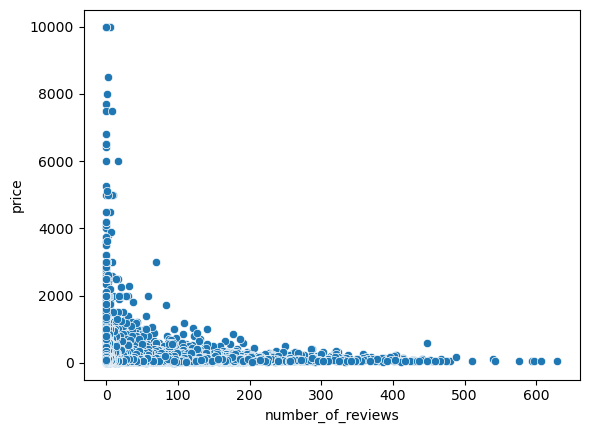

In [80]:
sns.scatterplot(x='number_of_reviews', y='price', data=df)


# Availability vs Price:

<Axes: xlabel='availability_365', ylabel='price'>

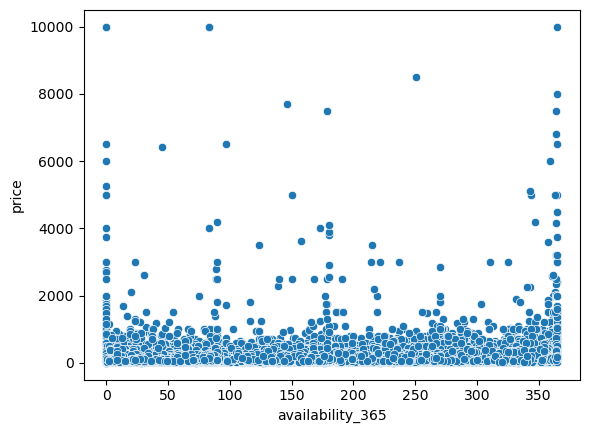

In [81]:
sns.scatterplot(x='availability_365', y='price', data=df)


# Room Type vs Neighbourhood Group

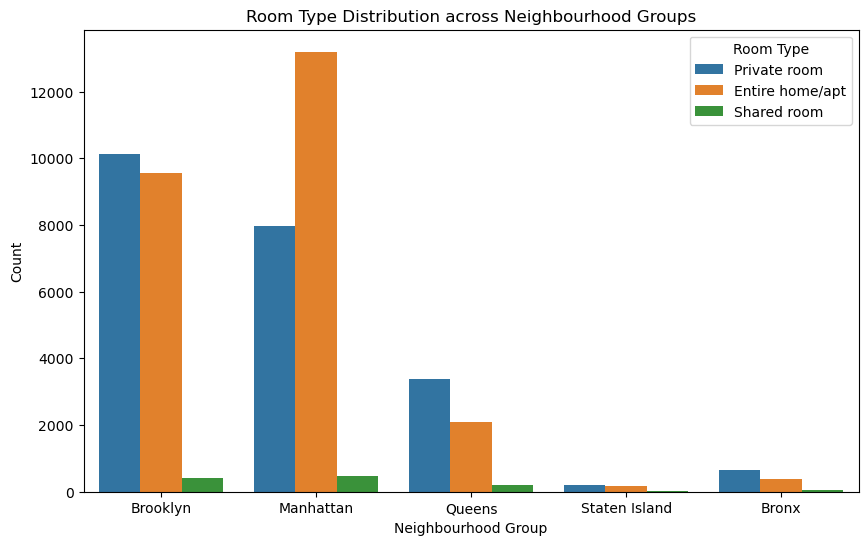

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title("Room Type Distribution across Neighbourhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.legend(title="Room Type")
plt.show()


# Price vs Minimum Nights

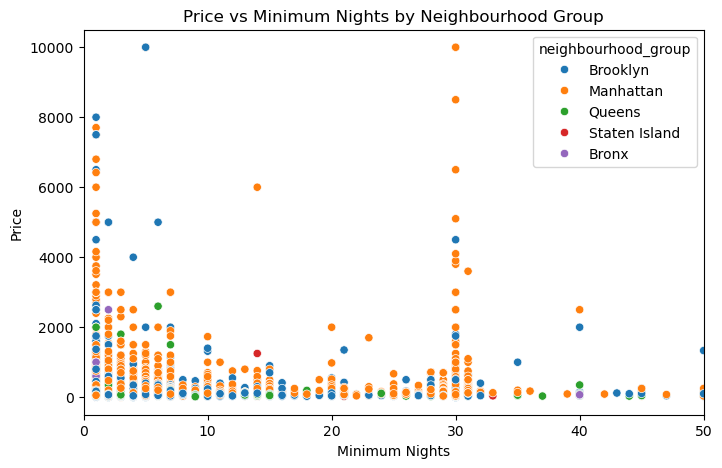

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='minimum_nights', y='price', hue='neighbourhood_group', data=df)
plt.title("Price vs Minimum Nights by Neighbourhood Group")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.xlim(0, 50)
plt.show()


# Number of Reviews vs Availability

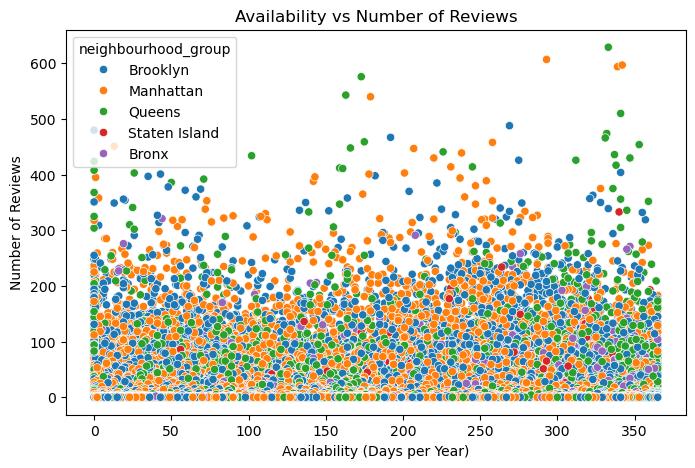

In [85]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='availability_365', y='number_of_reviews', hue='neighbourhood_group', data=df)
plt.title("Availability vs Number of Reviews")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Number of Reviews")
plt.show()


# Average Price per Neighbourhood Group and Room Type

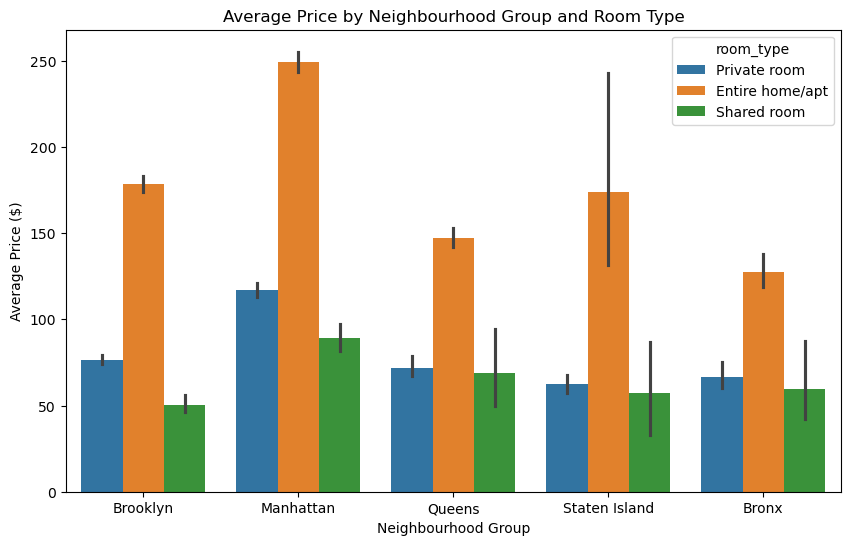

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=df, estimator='mean')
plt.title("Average Price by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.show()


# Correlation Heatmap (Numeric Only)

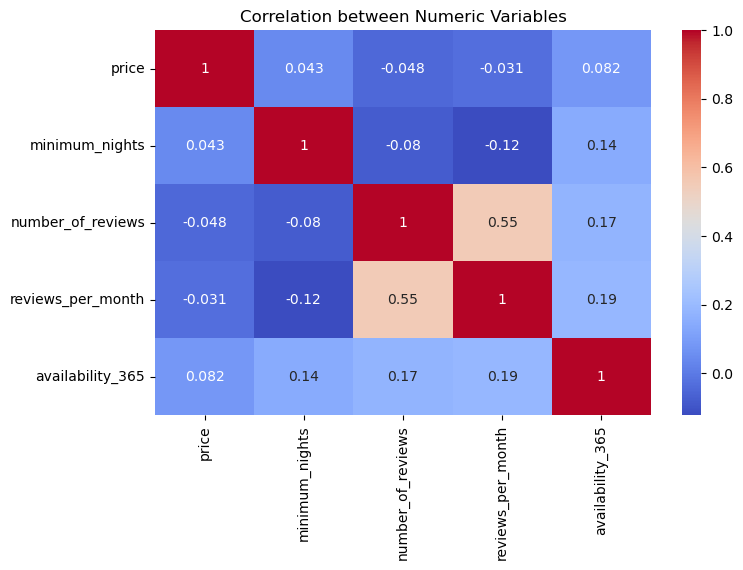

In [87]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Variables")
plt.show()


# Room Type vs Average Reviews

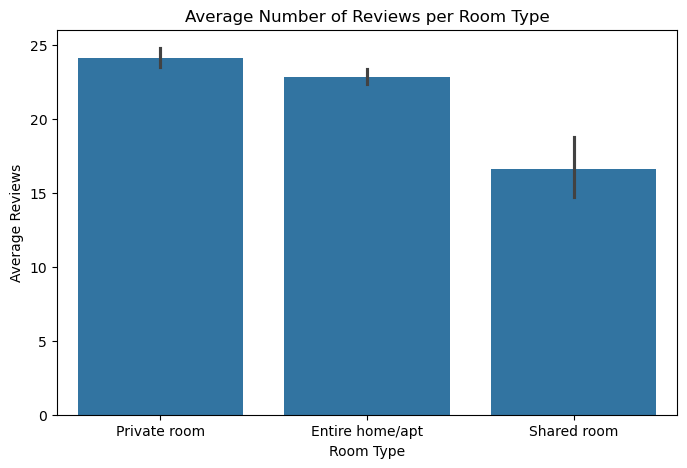

In [89]:
plt.figure(figsize=(8,5))
sns.barplot(x='room_type', y='number_of_reviews', data=df, estimator='mean')
plt.title("Average Number of Reviews per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Reviews")
plt.show()


# Availability vs Neighbourhood Group

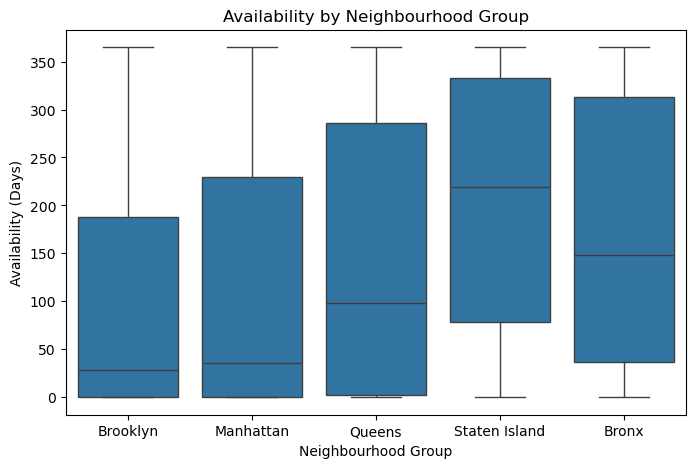

In [90]:
plt.figure(figsize=(8,5))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title("Availability by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Availability (Days)")
plt.show()


# STEP-6 MULTIVARIATE ANALSIS

Look for combined insights:

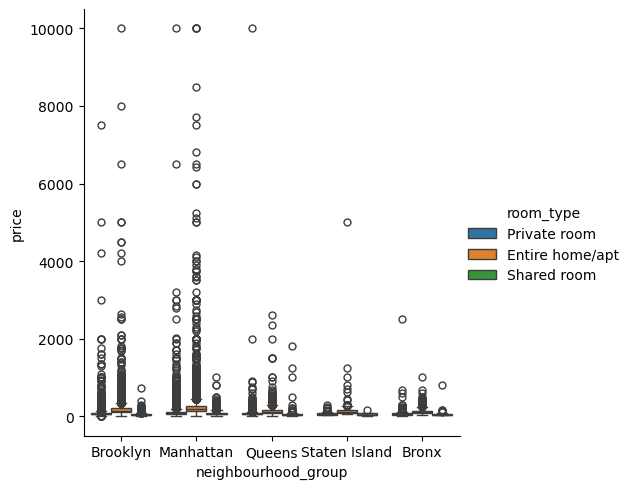

In [24]:
sns.catplot(x='neighbourhood_group', y='price', hue='room_type', kind='box', data=df)


# Price by Neighbourhood Group and Room Type (Combination Insight)

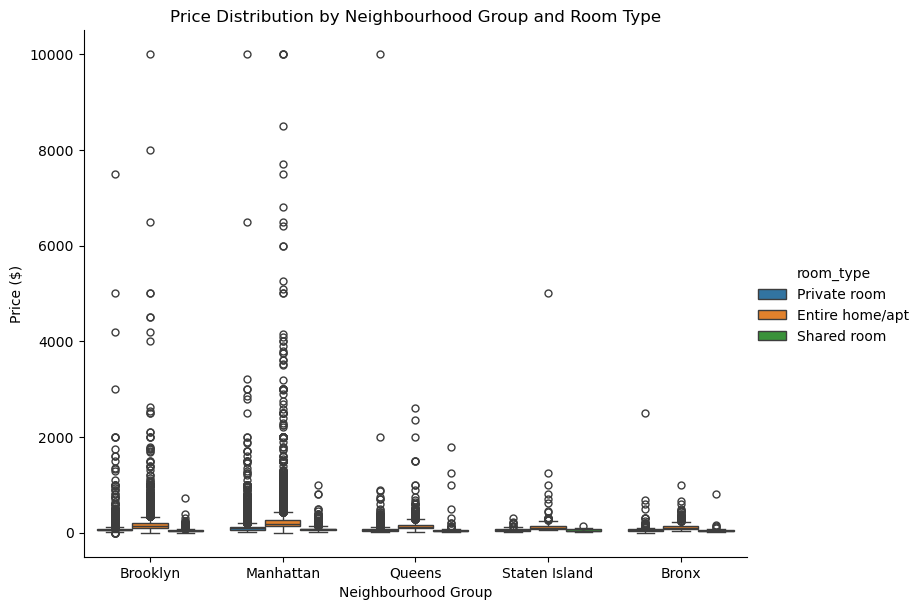

In [91]:
sns.catplot(x='neighbourhood_group', y='price', hue='room_type', kind='box', data=df, height=6, aspect=1.3)
plt.title("Price Distribution by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price ($)")
plt.show()


# Price vs Availability with Room Type

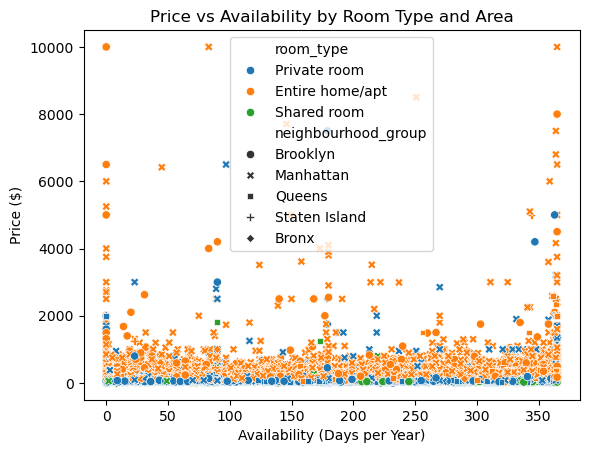

In [92]:
sns.scatterplot(x='availability_365', y='price', hue='room_type', style='neighbourhood_group', data=df)
plt.title("Price vs Availability by Room Type and Area")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price ($)")
plt.show() 


# Reviews vs Price with Neighbourhood Group

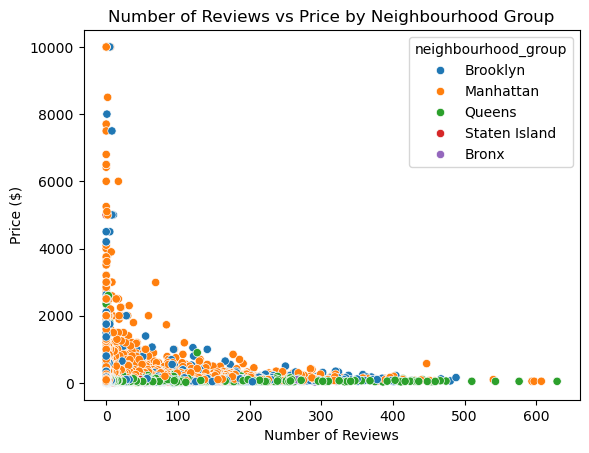

In [94]:
sns.scatterplot(x='number_of_reviews', y='price', hue='neighbourhood_group', data=df)
plt.title("Number of Reviews vs Price by Neighbourhood Group")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.show()


# Average Price and Reviews by Room Type + Neighbourhood Group

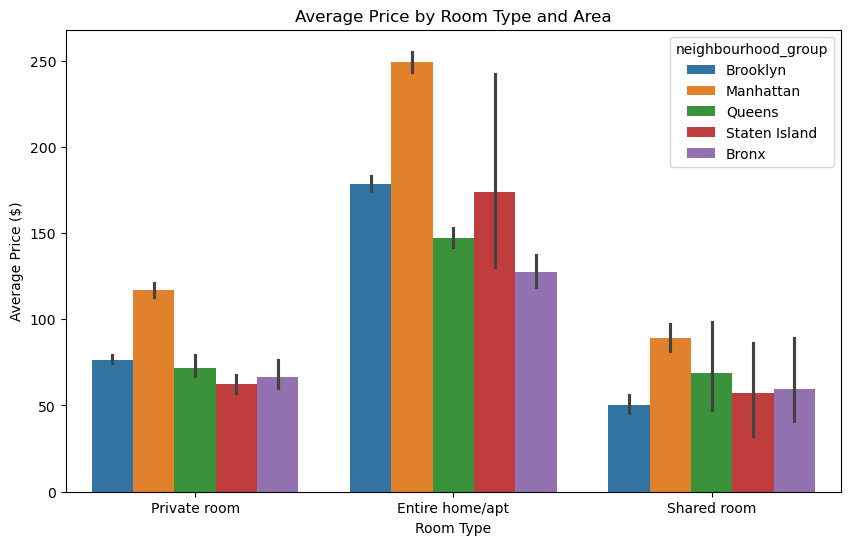

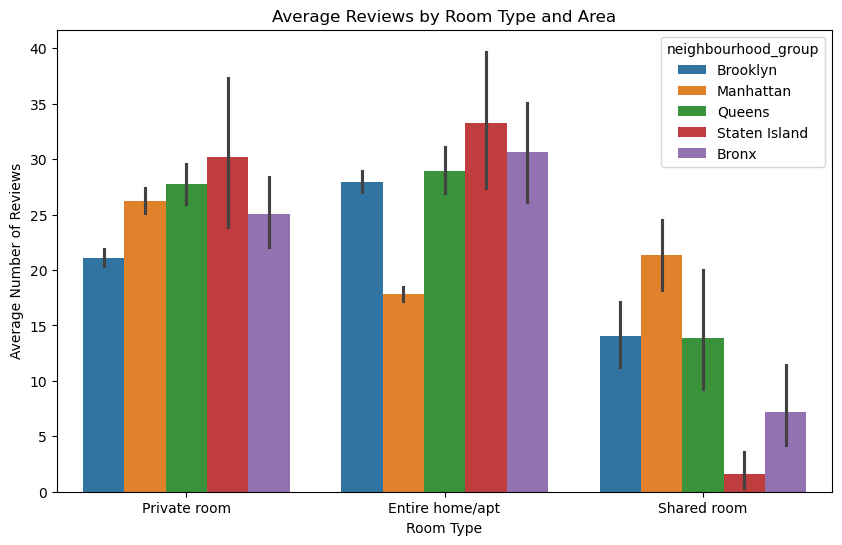

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=df, estimator='mean')
plt.title("Average Price by Room Type and Area")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='number_of_reviews', hue='neighbourhood_group', data=df, estimator='mean')
plt.title("Average Reviews by Room Type and Area")
plt.xlabel("Room Type")
plt.ylabel("Average Number of Reviews")
plt.show()


# Correlation Heatmap (All Numeric Variables)

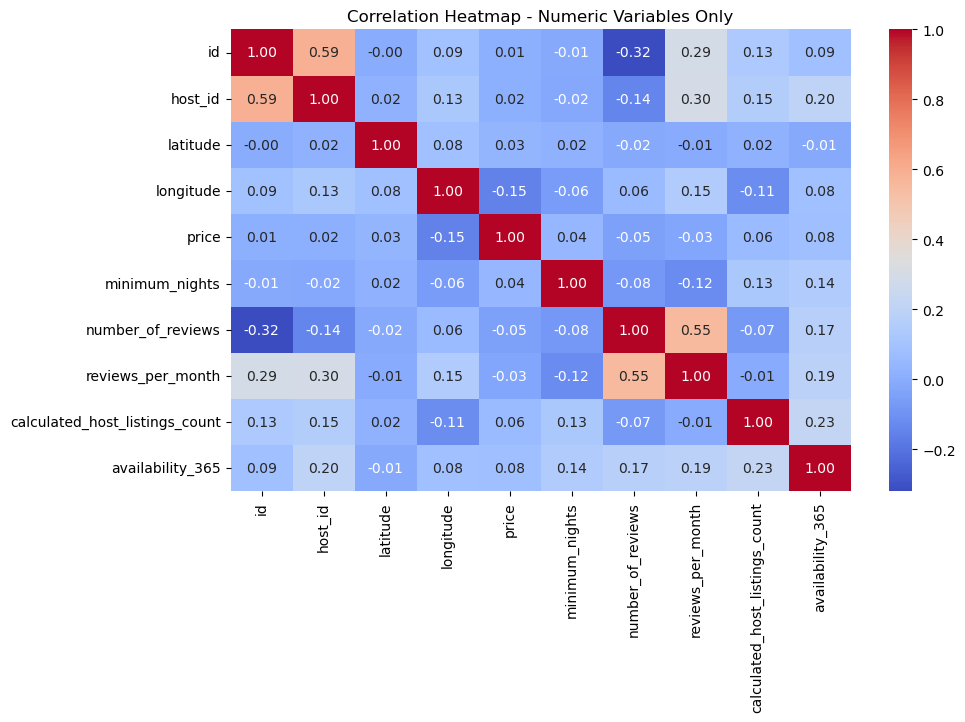

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numeric Variables Only")
plt.show()




# Pairplot (Visualize All Numeric Relationships Together)

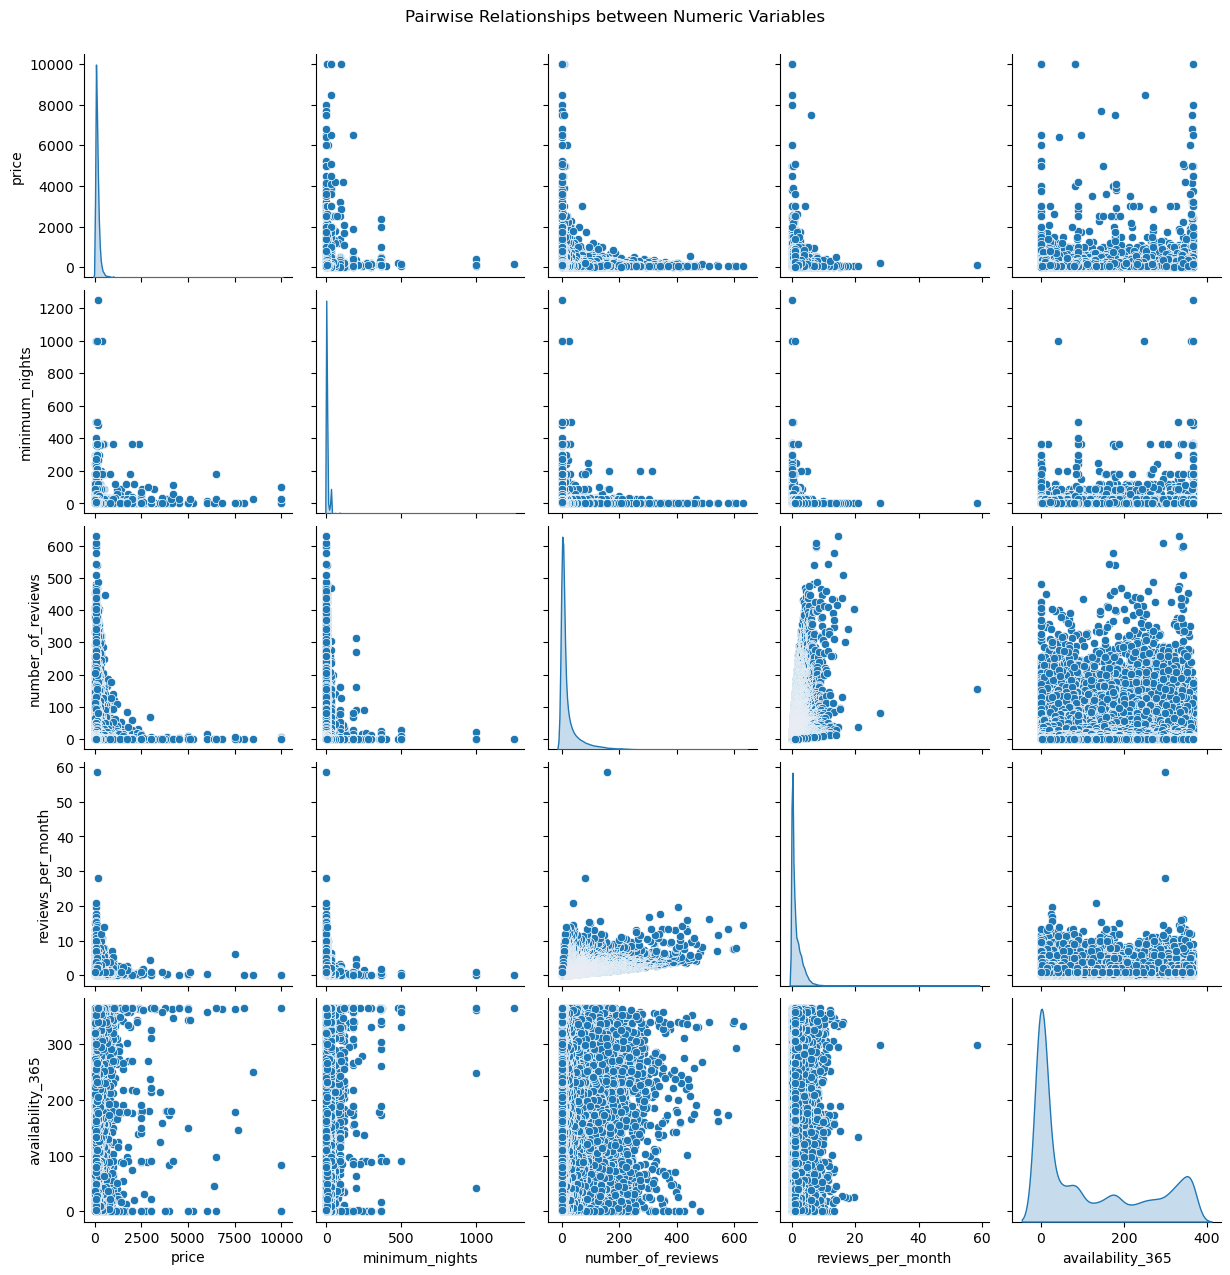

In [98]:
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']], diag_kind='kde')
plt.suptitle("Pairwise Relationships between Numeric Variables", y=1.02)
plt.show()


# Pivot Table Summary

In [100]:
pivot = df.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='mean')
print(pivot)


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.788344    59.800000
Brooklyn                  178.327545     76.500099    50.527845
Manhattan                 249.239109    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444


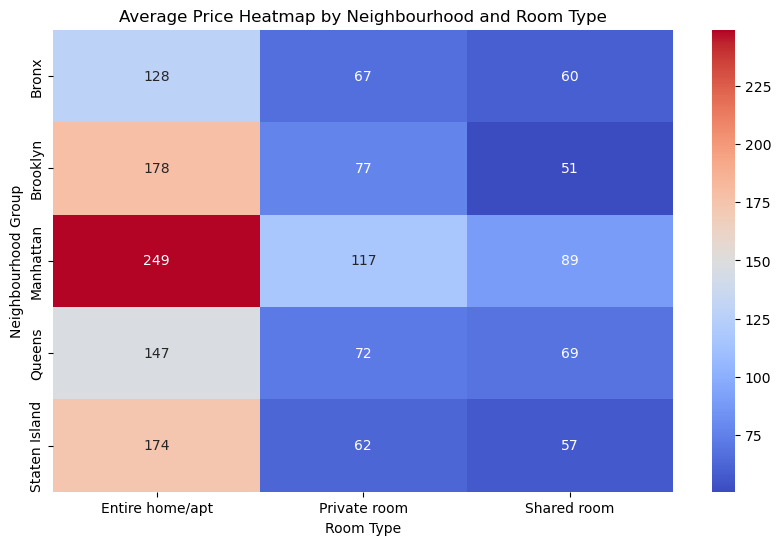

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title("Average Price Heatmap by Neighbourhood and Room Type")
plt.xlabel("Room Type")
plt.ylabel("Neighbourhood Group")
plt.show()


# Regression Plot (Numerical Relationships)

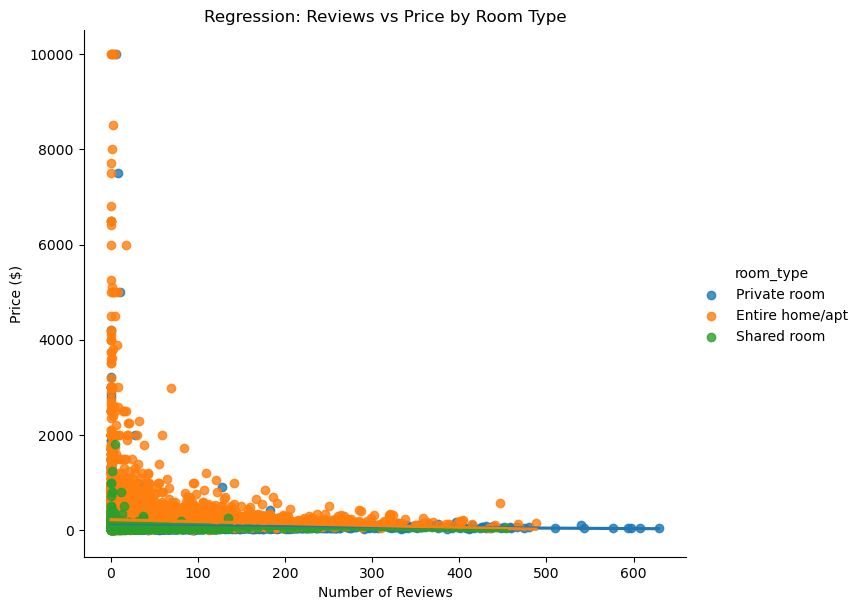

In [104]:
sns.lmplot(x='number_of_reviews', y='price', hue='room_type', data=df, height=6, aspect=1.2)
plt.title("Regression: Reviews vs Price by Room Type")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.show()


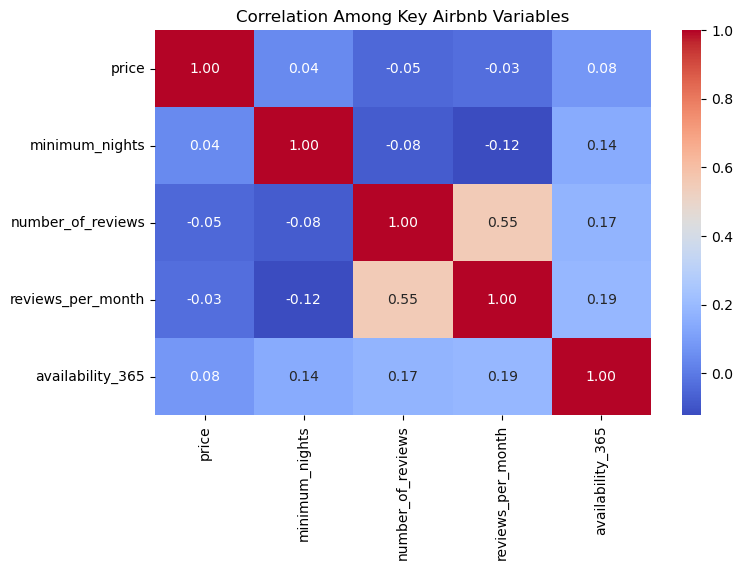

In [107]:
cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
corr = df[cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Among Key Airbnb Variables")
plt.show()


# STEP-7 CORRELATION ANALSIS

For numeric columns:

-See if price correlates with reviews, availability, or nights.

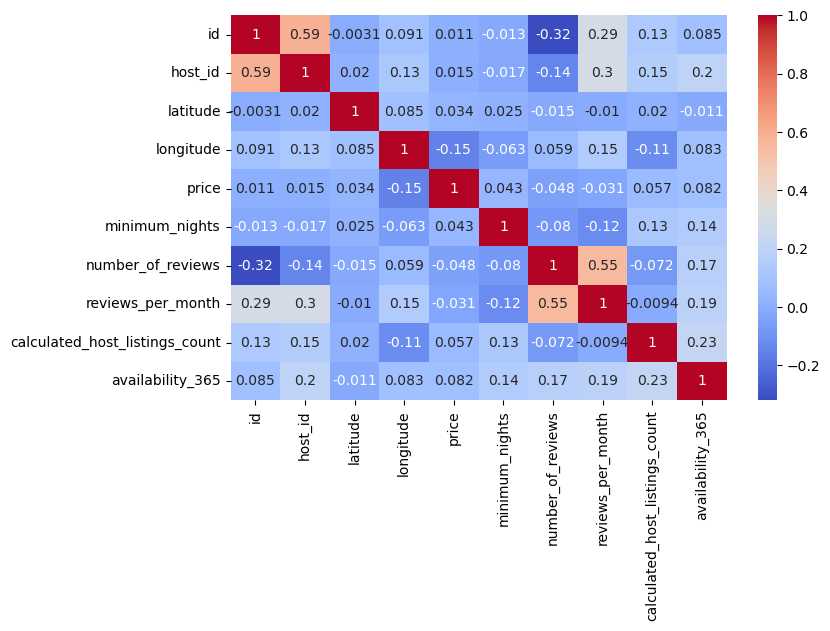

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])  # select only numeric columns
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


# STEP-9 VISUALIZATON TO INCLUDE 

- Countplot – Neighbourhood group

- Histogram – Price distribution

- Boxplot – Room type vs Price

- Barplot – Average price by Neighbourhood group

- Heatmap – Correlation matrix

- Scatter plot – Availability vs Price

-  Map plot – Latitude vs Longitude (optional)

# Countplot – Neighbourhood Group

C:\Users\aryan\AppData\Local\Temp\ipykernel_19948\3230951196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='Set2')


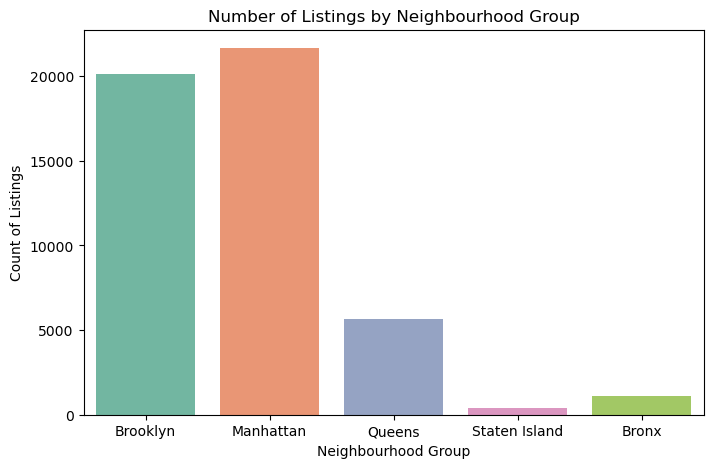

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', data=df, palette='Set2')
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of Listings")
plt.show()


# Histogram – Price Distribution

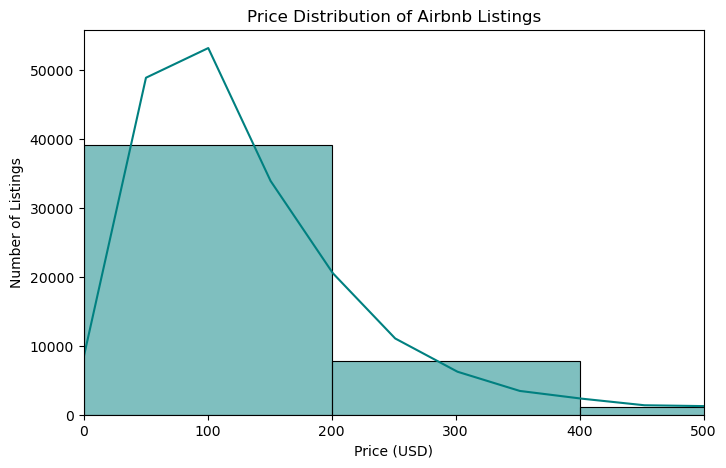

In [110]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Listings")
plt.xlim(0, 500)  # Optional: to avoid extreme outliers
plt.show()


# Boxplot – Room Type vs Price

C:\Users\aryan\AppData\Local\Temp\ipykernel_19948\1040494996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='Pastel1')


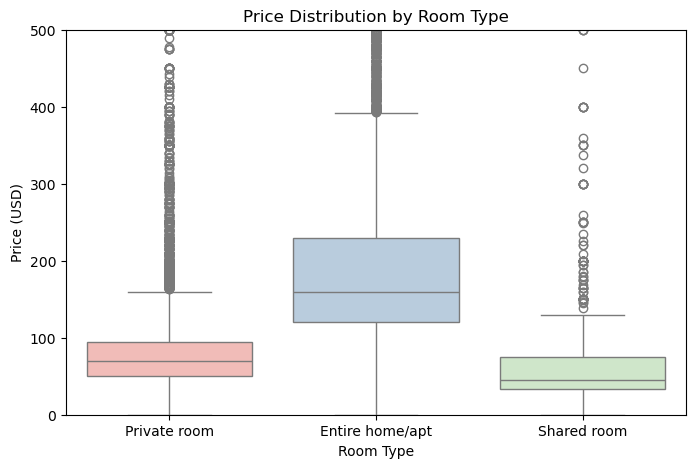

In [112]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df, palette='Pastel1')
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.ylim(0, 500)  # Optional to limit outlier effect
plt.show()


Insight: Entire homes/apartments are the most expensive; shared rooms are cheapest.`

# Barplot – Average Price by Neighbourhood Group

C:\Users\aryan\AppData\Local\Temp\ipykernel_19948\3707299828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, palette='cool')


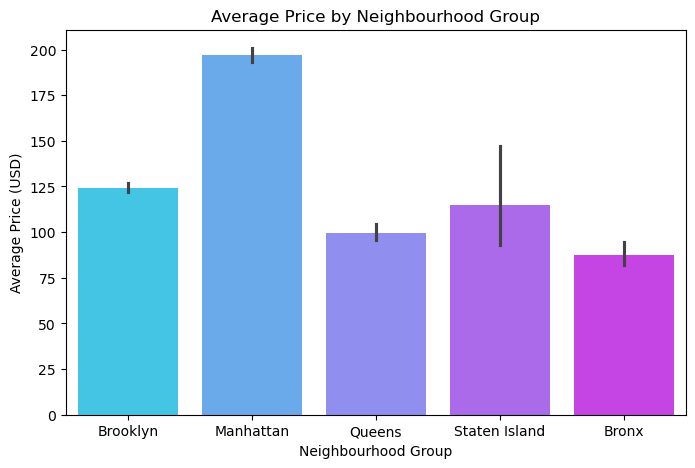

In [113]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, palette='cool')
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price (USD)")
plt.show()


# Heatmap – Correlation Matrix

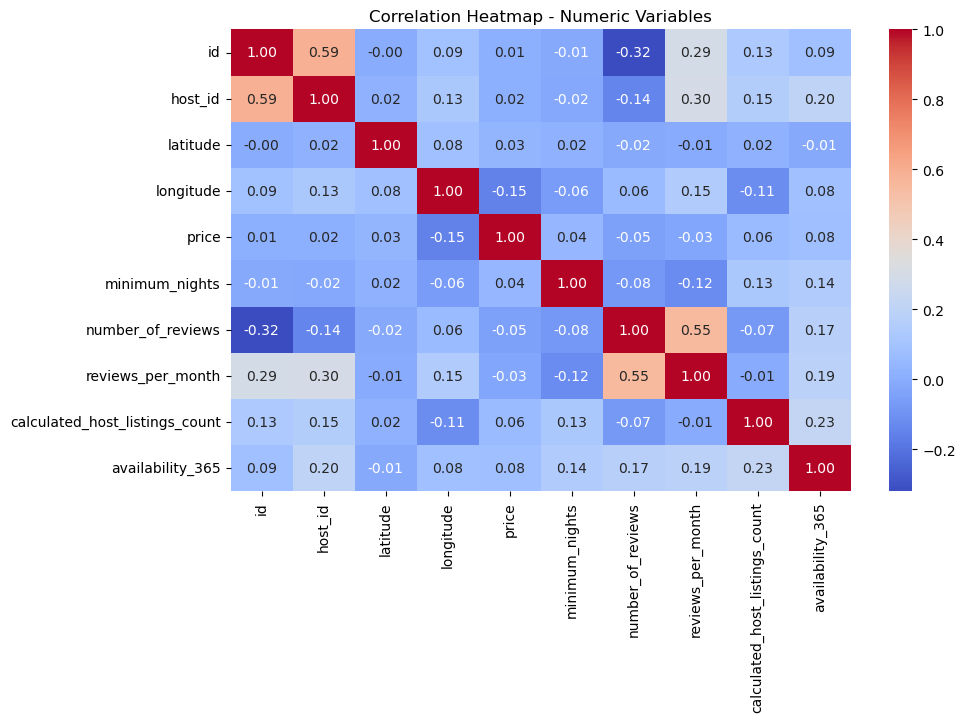

In [114]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numeric Variables")
plt.show()


# Scatter Plot – Availability vs Price

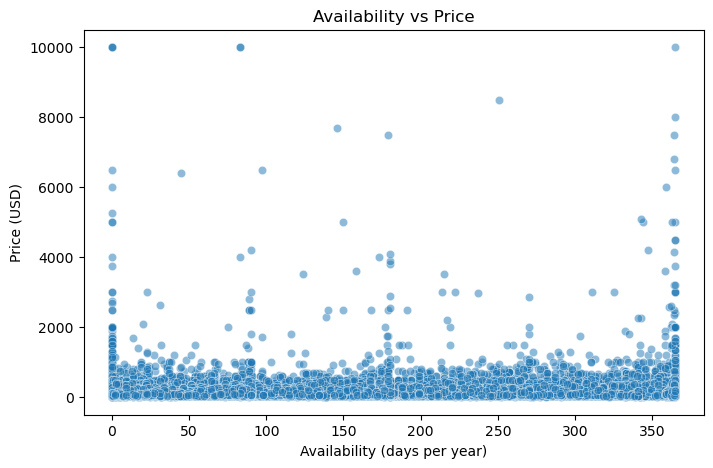

In [115]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.5)
plt.title("Availability vs Price")
plt.xlabel("Availability (days per year)")
plt.ylabel("Price (USD)")
plt.show()


# STEP-10 KEY INSIGHTS/BUSINESS CONCLUSIONS

# Neighbourhood Group Analysis

- Brooklyn and Manhattan dominate the Airbnb market — together, they make up the majority of listings in the dataset (over 70% combined).

- Staten Island and Bronx have the fewest listings, indicating less host participation or lower demand in those areas.

# Room Type Trends

- The most common room type is Entire home/apartment, followed by Private room.

- Shared rooms are extremely rare — showing guests prefer privacy during stays.

- This pattern suggests demand leans towards comfort and exclusivity rather than cost-sharing options.

# Price Distribution & Area Insights

- Manhattan has the highest average prices, often exceeding $150–200 per night, reflecting its central location and tourist appeal.

- Brooklyn follows as the second most expensive, offering slightly lower prices but high demand.

- Bronx and Staten Island offer budget-friendly stays.

# Relationship Between Price & Reviews

- Cheaper listings tend to have more reviews, suggesting that affordable accommodations attract more bookings and engagement.

- Higher-priced listings generally have fewer reviews, possibly due to their niche luxury audience or lower booking frequency.

# Availability & Price

- Listings with higher availability (more open days per year) tend to have lower prices, which may indicate less demand for those properties.

- Conversely, frequently booked listings (low availability) are often priced higher, likely reflecting strong market demand.

# Outliers & Unusual Patterns

- Several extreme price outliers (e.g., properties priced above $1,000 per night) were identified — possibly luxury penthouses or incorrect data entries.

- Minimum nights also had outliers (some listings requiring over 100 nights) — likely long-term rentals.

- These outliers can skew averages, so median values are often more reliable for insights.

# Overall Business Understanding

- Manhattan offers high-revenue potential, but competition and pricing pressure are significant.

- Brooklyn provides a balanced market — good mix of affordability and popularity.

- Focusing on Private or Entire homes in mid-priced areas could be a profitable strategy for hosts.

- For Airbnb, optimizing search ranking and dynamic pricing in these neighborhoods could enhance both occupancy and customer satisfaction.

# Summary / Conclusion

The exploratory data analysis of Airbnb NYC 2019 reveals clear market patterns and customer preferences. Most listings are concentrated in Manhattan and Brooklyn, highlighting these as the most active and competitive markets. Entire homes/apartments dominate the platform, showing that guests prioritize privacy and comfort. Price analysis indicates that Manhattan has the highest average listing prices, while Bronx and Staten Island offer the most affordable stays. Furthermore, lower-priced properties tend to attract more reviews, suggesting that affordability drives higher booking frequency. Listings with greater availability are generally less in demand, often reflecting lower prices. Outliers were detected in both price and minimum nights, which may represent either luxury properties or data entry errors.
Overall, Airbnb’s data suggests that pricing, location, and room type are key factors influencing demand and profitability. Strategic use of this information can help Airbnb optimize pricing strategies, support host recommendations, and enhance customer satisfaction.